In [1]:
import numpy as np

In [2]:
class MSE:
    
    def __init__(self, rate=0.01, cycles=10000):
        self.rate = rate
        self.cycles = cycles
        
    def run(self, points, ids):
        self.theta = np.zeros(np.size(points[0]))
        self.bias = 0
        
        self.best_theta = np.zeros(np.size(points[0]))
        self.best_bias = 0
        self.best_miss_count = len(ids)
        self.best_best_miss = []
        
        self.loss = np.zeros(self.cycles)
        
        for i in range(self.cycles):
            for point, truth in zip(points, ids):
                error = (truth - self.predict(point)) / 2
                self.compute_loss(i, point, truth, len(ids))
                shift = abs(error) * self.rate
                dot = np.dot(point, self.theta)
                self.bias -= shift * (2 / len(ids)) * (dot - truth)
                self.theta -= shift * point * (2 / len(ids)) * (dot - truth)
            self.compute_miss(points,ids)
        
        self.report(points, ids)
        return self

    def compute_loss(self, i, x, y, m):
        dot = np.dot(x, self.theta)
        self.loss[i] += ((y - dot)**2) / m
    
    def predict(self, ds):
        return np.where(np.dot(ds, self.theta) + self.bias > 0, 1, -1)
    
    def compute_miss(self, points, ids):
        miss_count = 0
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss_count += 1
                miss.append(point)
        if miss_count <= self.best_miss_count:
            self.best_miss_count = miss_count
            self.best_miss = miss
            self.best_bias = self.bias
            self.best_theta = self.theta
    
    def report(self, points, ids):
        miss = []
        for point, truth in zip(points, ids):
            prediction = self.predict(point)
            if truth - prediction != 0:
                miss.append([point, prediction, truth])
        if len(miss) > 0:
            print("Mislabeled:")
            for c in miss:
                print("{0}, prediction: {1}, truth: {2}".format(c[0], c[1], c[2]))

In [3]:
mse = MSE()

In [4]:
data = np.load('Data6/data.npz')
x = data['x']
y = np.where(data['y'] > 0, 1, -1)

In [5]:
out = mse.run(x,y)

Mislabeled:
[-0.31614901  1.87605657  1.44811891  0.32817385], prediction: 1, truth: -1
[2.46810471 0.46356975 0.74726428 0.14156749], prediction: 1, truth: -1
[ 1.57219761  1.44814411  0.67527587 -0.14375625], prediction: 1, truth: -1
[0.72035419 1.97134466 0.59783723 0.67200369], prediction: 1, truth: -1


In [6]:
print(out.theta)
print(out.bias)
print(out.best_theta)
print(out.best_bias)
print(out.best_miss)

[ 0.00234784  0.00377167 -0.0046117  -0.00567558]
0.0022093979832471813
[ 0.00234784  0.00377167 -0.0046117  -0.00567558]
0.0012350508338109757
[array([2.46810471, 0.46356975, 0.74726428, 0.14156749]), array([ 1.57219761,  1.44814411,  0.67527587, -0.14375625]), array([0.72035419, 1.97134466, 0.59783723, 0.67200369])]


In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

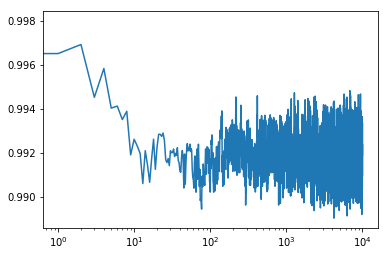

In [8]:
plt.plot(out.loss)
plt.xscale('log')

In [9]:
if len(x[0]) == 2:
    plot_decision_regions(x, y, clf=perc)